In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df_raw = pd.read_csv("../../game_data.csv")
df_raw

,Id,Weapon0,Weapon1
0,0,Lebel 1886,Romero
1,1,Caldwell Pax,Lebel 1886
2,2,Lebel 1886,Specter 1882 Bayonet
3,3,Lebel 1886,Romero
4,4,Winfield M1873 Talon,Specter 1882 Bayonet
5,5,Caldwell Pax,Lebel 1886
6,6,Sparks LRR,Specter 1882 Bayonet
7,7,Sparks LRR,Sparks LRR
8,8,Lebel 1886,Specter 1882 Bayonet
9,9,Winfield M1873 Talon,Specter 1882 Bayonet


In [61]:
df_game_data = df_raw.reindex(df_raw.loc[:, "Id"]).drop("Id", axis=1)
df_game_data

,Weapon0,Weapon1
Id,,
0,Lebel 1886,Romero
1,Caldwell Pax,Lebel 1886
2,Lebel 1886,Specter 1882 Bayonet
3,Lebel 1886,Romero
4,Winfield M1873 Talon,Specter 1882 Bayonet
5,Caldwell Pax,Lebel 1886
6,Sparks LRR,Specter 1882 Bayonet
7,Sparks LRR,Sparks LRR
8,Lebel 1886,Specter 1882 Bayonet


In [62]:
df_game_data.loc[:,:] = df_game_data.loc[df_game_data["Weapon0"]!=df_game_data["Weapon1"], :]
df_game_data

,Weapon0,Weapon1
Id,,
0,Lebel 1886,Romero
1,Caldwell Pax,Lebel 1886
2,Lebel 1886,Specter 1882 Bayonet
3,Lebel 1886,Romero
4,Winfield M1873 Talon,Specter 1882 Bayonet
5,Caldwell Pax,Lebel 1886
6,Sparks LRR,Specter 1882 Bayonet
7,NaN,NaN
8,Lebel 1886,Specter 1882 Bayonet


In [63]:
df_plot_data = pd.DataFrame([[0]*3]*6,index =["Winfield M1873 Talon", "Romero", "Caldwell Pax",
                                    "Lebel 1886", "Sparks LRR", "Specter 1882 Bayonet"], 
                            columns = ["Games", "Wins", "Winrate"])
# print(df_plot_data)
grp0 = df_game_data.groupby("Weapon0")
grp1 = df_game_data.groupby("Weapon1")
# print(grp1.count())

df_plot_data = df_plot_data.join(grp0.count().loc[:, "Weapon1"]).join(grp1.count().loc[:, "Weapon0"]).fillna(0)
df_plot_data["Games"] = df_plot_data["Weapon1"] + df_plot_data["Weapon0"]
# print(df_plot_data)
df_plot_data["Wins"] = df_plot_data["Weapon1"]
df_plot_data["Winrate"] = df_plot_data["Wins"]/df_plot_data["Games"]
df_plot_data

,Games,Wins,Winrate,Weapon1,Weapon0
Winfield M1873 Talon,2.0,2.0,1.000000,2.0,0.0
Romero,2.0,0.0,0.000000,0.0,2.0
Caldwell Pax,2.0,2.0,1.000000,2.0,0.0
Lebel 1886,6.0,4.0,0.666667,4.0,2.0
Sparks LRR,1.0,1.0,1.000000,1.0,0.0
Specter 1882 Bayonet,5.0,0.0,0.000000,0.0,5.0


In [7]:
df_plot_data["Winrate_deviation"] = abs(df_plot_data["Winrate"]-0.5)
reward = 3 - df_plot_data["Winrate_deviation"].sum()
reward, df_plot_data["Winrate_deviation"]

(2.8333333333333335,
 Weapon0
 Caldwell Pax                 NaN
 Lebel 1886              0.166667
 Sparks LRR                   NaN
 Winfield M1873 Talon         NaN
 Name: Winrate_deviation, dtype: float64)

,Winrate,Winrate_deviation
Weapon0,,
Caldwell Pax,NaN,NaN
Lebel 1886,0.666667,0.166667
Sparks LRR,NaN,NaN
Winfield M1873 Talon,NaN,NaN


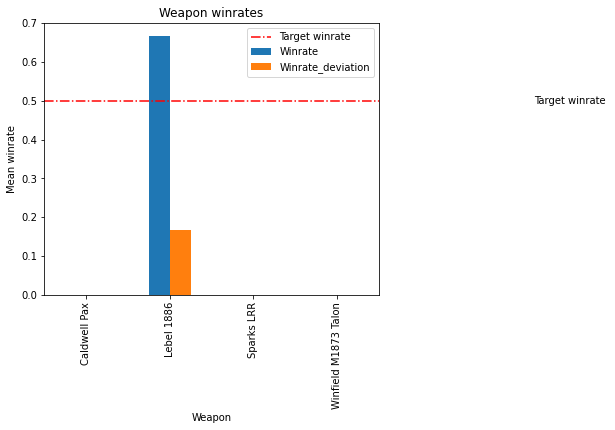

In [8]:
plot_data = df_plot_data.drop(["Wins", "Games"], axis=1)
plot_data.plot(kind='bar', title='Weapon winrates', ylabel='Mean winrate', xlabel='Weapon', figsize=(6, 5))
plt.hlines(0.5, -0.5, 5.3, color='red', label="Target winrate", linestyle="-.")
plt.text(5.35, 0.5, 'Target winrate ', ha='left', va='center')
plt.legend().get_texts()[1].set_text('Winrate')
plot_data

Caldwell Pax jest na ten moment poprawnie zbalansowany - jest około 50%. Należy nieco pogorszyć Lebel'a, Sparks'a i Winfield'a - są zbyt mocne. Polepszenia wymagają Romero i Specter, więc strzelby bliskiego zasięgu.

In [9]:
df_game_data.loc[:, "1"] = 1
df_cross_winrates = df_game_data.groupby(["Weapon0", "Weapon1"]).count()

weapons = ["Caldwell Pax", "Lebel 1886", "Romero", "Sparks LRR",
           "Specter 1882 Bayonet", "Winfield M1873 Talon"]
df_winrate_matrix = pd.DataFrame(columns = weapons, index = weapons)
for weapon1 in weapons:
    for weapon2 in weapons:
        if weapon1 != weapon2:
            wins_with_w1 = df_cross_winrates.loc[(weapon1, weapon2), "1"]
            wins_with_w2 = df_cross_winrates.loc[(weapon2, weapon1), "1"]
            df_winrate_matrix.at[weapon1, weapon2] = wins_with_w1/(wins_with_w1+wins_with_w2)
        else:
            df_winrate_matrix.at[weapon1, weapon2] = 0.5

df_winrate_matrix = df_winrate_matrix.astype("float")
df_winrate_matrix

KeyError: ('Lebel 1886', 'Caldwell Pax')

D:\Users\Jacek\anaconda3\lib\site-packages\matplotlib\colors.py:587: RuntimeWarning: invalid value encountered in greater
  xa[xa > self.N - 1] = self._i_over
D:\Users\Jacek\anaconda3\lib\site-packages\matplotlib\colors.py:588: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = self._i_under


IndexError: arrays used as indices must be of integer (or boolean) type

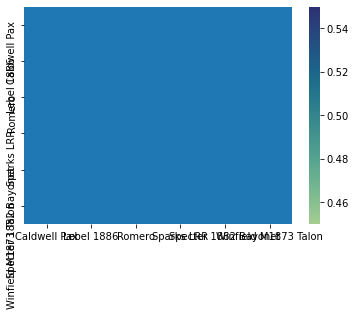

In [10]:
sns.heatmap(data = df_winrate_matrix, cmap=sns.color_palette("crest", as_cmap=True), annot=True)